
# Step 1: Setting Up Our Workspace
Let's get our Python tools ready for analyzing housing data.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Step 2: Load and Explore the California Housing Dataset
Examine our dataset to understand the housing market features.

In [ ]:
# Load the housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Display dataset information
print("Dataset Description:")
print("-------------------")
print(housing.DESCR)

# Show first few rows of data
print("\nFirst few rows of the dataset:")
print("-------------------")
df = pd.DataFrame(X, columns=housing.feature_names)
print(df.head())

# Basic statistics
print("\nBasic Statistics:")
print("-------------------")
print(df.describe())

Dataset Description:
-------------------
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from t

# Step 3: Split the Dataset into Training and Testing Sets
Divide our data to train and evaluate our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 16512
Testing set size: 4128


# Step 4: Train the Random Forest Regressor
Build our ensemble of trees to predict housing prices.




In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# #added during screencast
print("\nModel Parameters:")
print("-------------------")
print(f"Number of trees: {rf_regressor.n_estimators}")
print(f"Maximum depth: {rf_regressor.max_depth}")


Model Parameters:
-------------------
Number of trees: 100
Maximum depth: None


# Step 5: Evaluate Model Performance
Test how well our model predicts housing prices.

In [ ]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = rf_regressor.score(X_test, y_test)

print("\nModel Performance Metrics:")
print("-------------------------")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
-------------------------
Root Mean Squared Error: 0.5053
R² Score: 0.8051


# Step 6: Visualizing Feature Importance
Discover which features most influence housing prices.

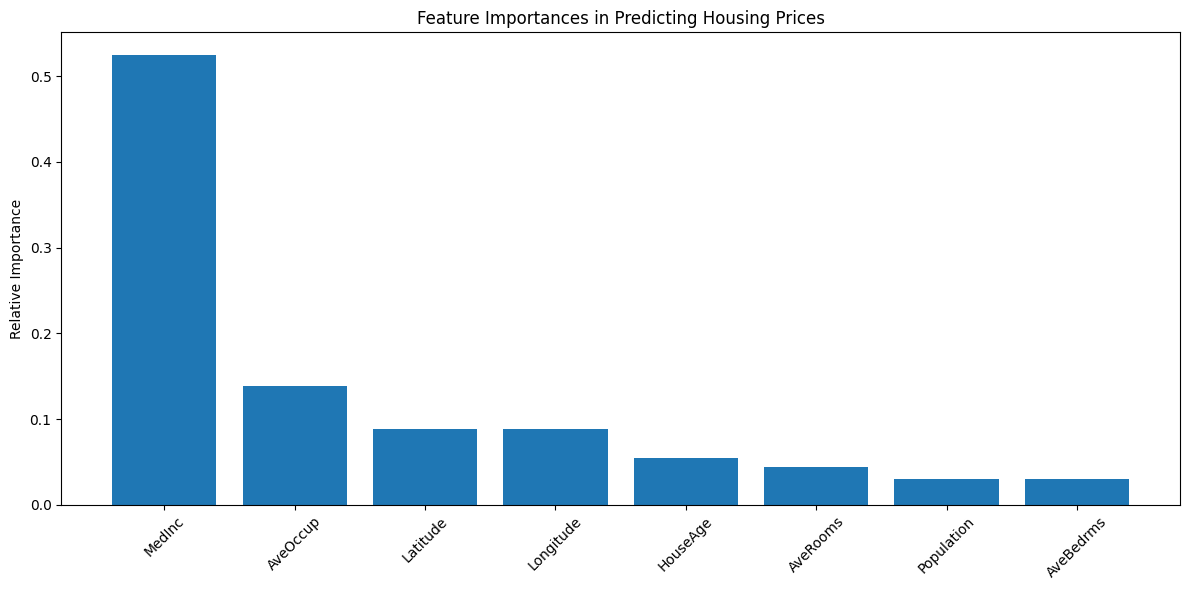

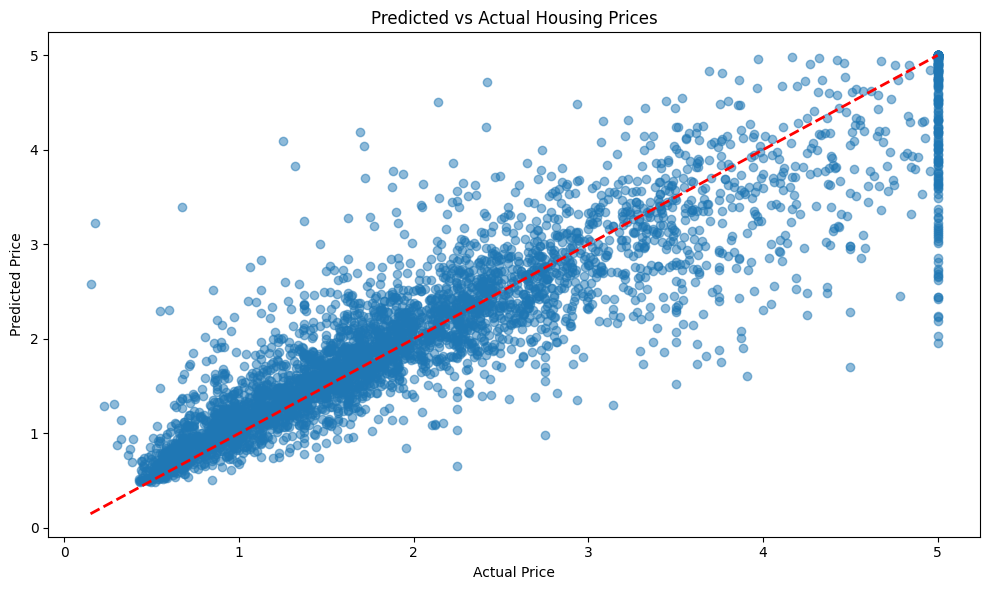

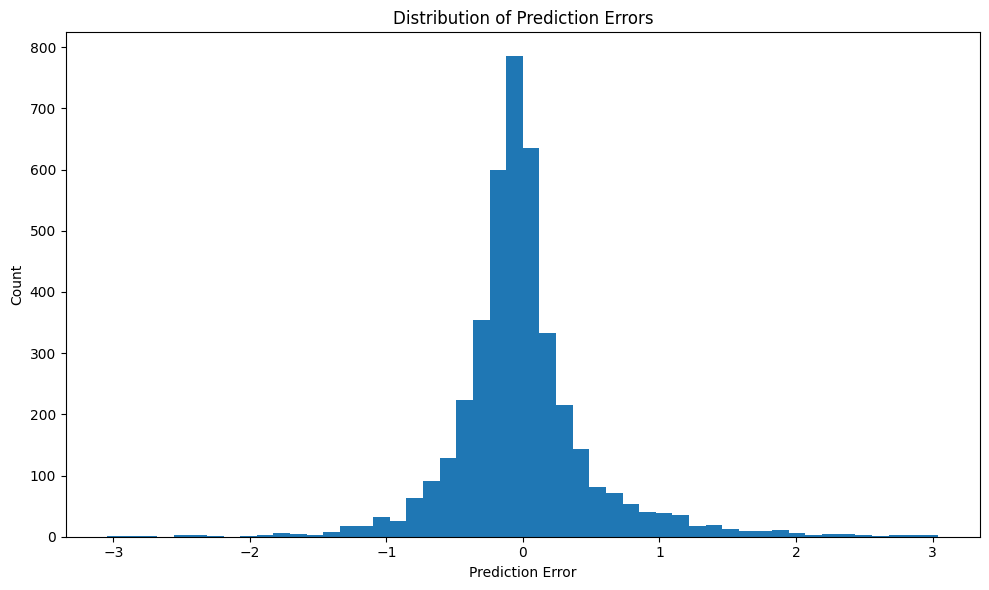

In [ ]:
# Calculate feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Create feature importance plot
plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Predicting Housing Prices')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [housing.feature_names[i] for i in indices], rotation=45)
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
# #added during screencast
# Additional visualization: Predicted vs Actual Values
# =====================================

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Housing Prices')
plt.tight_layout()
plt.show()

# #added during screencast
# Visualization: Distribution of Prediction Errors
# =====================================

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()